# Galaxy Dynamics with python + Gaia
## *NBIA Dynamics Summer School*
### Jason Sanders - 15th Aug 2024

In [1]:
# %%html
# <style>
# .rendered_html{
#     font-size:0.75em;
# }
# .rendered_html code{
#     font-size:0.65em;
# }
# </style>

t.ly/RRjIg

<img src="plots/qr.png" width=300px></img>

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import galpy
import seaborn as sns
from astroquery.gaia import Gaia
sns.set(rc={'backend': 'Cairo','axes.labelsize': 15,
            'legend.fontsize': 15,'xtick.labelsize': 13,'ytick.labelsize': 13,
            'font.size':15,'text.usetex': False,'font.family':'Times New Roman',
            'font.serif':'Times', 'figure.figsize':np.array([8.,5.5])})
sns.set_style("white")
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, YouTubeVideo
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current,
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

ModuleNotFoundError: No module named 'galpy'

This lecture is entirely produced in a jupyter notebook. You should be able to run and inspect all of the examples.

Requirements
- [Python >=3.12.5](https://www.python.org/downloads/)
- Easy to use [conda through miniforge](https://github.com/conda-forge/miniforge)
- Set up environment:
    ```
    conda create -n nbia -y python galpy jupyterlab seaborn astroquery && conda activate nbia
    ```
    
<div class="alert alert-block alert-success">
<b>TASK</b>: check everyone has working installation
</div>

The aim of this notebook is to teach you about querying large databases using TAP SQL/ADQL, using some parts of the ```astropy``` package and ```galpy```, a galactic dynamics package.

We will use as an example data on stars within the Milky Way from the *Gaia* satellite.

# Gaia

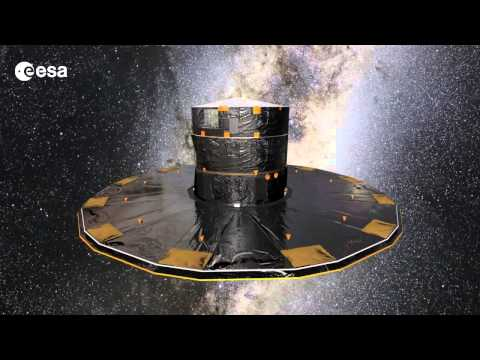

In [ ]:
from IPython.display import HTML, YouTubeVideo
YouTubeVideo('BnFyzZGWuYs',width=800,height=500,start=4,mute=1)

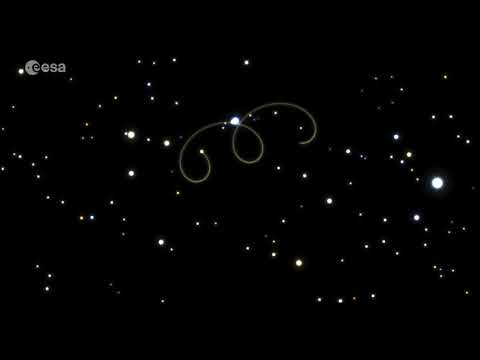

In [ ]:
YouTubeVideo('a3pMkp0wX7I',width=800,height=500,start=4,mute=1)

<img src="https://www.gaia.ac.uk/sites/default/files/Gaia_Milky_Way_stars.jpg" width="1000px"></img>

<img src="https://www.cosmos.esa.int/documents/29201/8898486/SkymapscollageDR3landscape_small.jpg/32a8eb72-580e-6ee6-a2c3-7ba2424eae84?t=1655056474394" width="1000px"></img>

# Remotely querying astro databases

Astronomy datasets can be very large. For example, Gaia EDR3 contains approximately 1.8 billion sources and ~100 columns. It is therefore impractical to download and work with the full dataset. The alternative is to *query* remote databases for only the subset of data you need.

The *Table Access Protocol* ([TAP](https://www.ivoa.net/documents/TAP/)) is a standard agreed-upon web protocol for accessing astronomical table data.

A query consists of a command to select (and possibly process) a set of data from a server.

The queries can be executed *synchronously* if small. The data is then returned by the request.

If the query is large, they can be executed *asynchronously* and a link to where the data will be temporarily held is returned.

TAP services are offered by many large astronomical data centres. For example, [*Vizier*](http://tapvizier.u-strasbg.fr/TAPVizieR/tap/) have a TAP service for accessing all the community-uploaded tables.

TAP services can be accessed simply through ```HTTP POST``` requests. In practice, it is more useful to use programmes/packages which send the ```POST``` requests for you.
1. [TOPCAT](http://www.star.bris.ac.uk/~mbt/topcat/): great interactive viewer
2. Python packages: here we will use ```astroquery``` but many available.

Typically TAP queries are written in the Astronomical Data Query Language ([ADQL](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html)).

This is based upon SQL (Structured Query Language) which is a standard language for accessing databases.

ADQL includes a number of functions specific to common astronomy operations. Primarily this consists of geometric functions for performing selections on the sky. For example, selection in a cone, box, arbitrary polygon.

Basic SQL commands look like

```sql
select table_1.column_1, table_1.column_2, ...,
       table_2.column_1, ...
        
from table_1, table_2, ...

where {conditions}
```

For example, we will use the ```gaia``` submodule as part of the ```astroquery``` package for using the [Gaia TAP service](https://gea.esac.esa.int/).

This module allows us to run a

1. synchronous query (```launch_job```) or
3. asynchronous query (```launch_job_async```).

```astroquery``` contains a more generic ```tap``` submodule for accessing generic services (from which ```gaia``` is derived).

We will grab first 100 (``top 100``) Gaia parallaxes ($\varpi$) where the uncertainties are better than 20 percent.

```sql
select top 100 parallax, parallax_over_error
from gaiadr3.gaia_source
where parallax_over_error>5;
```

In [ ]:
job = Gaia.launch_job_async(
    """select top 100 parallax, parallax_over_error
       from gaiadr3.gaia_source
       where parallax_over_error>5;"""
)

table = job.get_results()
print(table)

INFO: Query finished. [astroquery.utils.tap.core]
      parallax      parallax_over_error
        mas                            
------------------- -------------------
 0.3673025799209767            5.620367
 0.6197152778966586           13.413948
 0.5358654288931387            5.737241
  0.936242371989373           52.189507
 0.6058681989078933           13.753484
0.43291070023323275          14.2607355
 0.7733113876637436           7.6136737
 0.5285157288742246           5.3248024
 6.0823284779791535           5.4309106
                ...                 ...
 0.6564000188449858           5.7522855
 1.8361664607988477           13.718028
 0.3890725301098979            5.551838
 2.3596172011192547           6.1614394
 0.5658536834879154           10.053647
  1.399201150115282            6.193245
 0.3284812574037132            5.141965
0.44711607570175926            9.262634
 1.1472295674330566           14.094373
 0.5627004290229045           13.583047
Length = 100 rows


If instead we wanted all columns, we could use the ```*``` syntax.  

```sql
select top 100 * from gaiadr3.gaia_source
    where parallax_over_error>5;
```

In [ ]:
job = Gaia.launch_job_async(
    "select top 100 * from gaiadr3.gaia_source where parallax_over_error>5;"
)

table = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
print(table.columns)

<TableColumns names=('solution_id','DESIGNATION','SOURCE_ID','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_matched_transits','visibility_periods_used','astrometric_sigma5d_max','matched_transits','new_matched_transits','matched_transits_removed','ip

In [ ]:
print(table)

    solution_id             DESIGNATION          ... libname_gspphot
                                                 ...                
------------------- ---------------------------- ... ---------------
1636148068921376768 Gaia DR3 5937145022359844096 ...               A
1636148068921376768 Gaia DR3 5937145022359853312 ...                
1636148068921376768 Gaia DR3 5937145022359864960 ...                
1636148068921376768 Gaia DR3 5937145052338253568 ...         PHOENIX
1636148068921376768 Gaia DR3 5937173918882659200 ...         PHOENIX
1636148068921376768 Gaia DR3 5937173918882672128 ...         PHOENIX
1636148068921376768 Gaia DR3 5937173918882679808 ...         PHOENIX
1636148068921376768 Gaia DR3 5937173918882682240 ...         PHOENIX
1636148068921376768 Gaia DR3 5937082040953371008 ...           MARCS
                ...                          ... ...             ...
1636148068921376768 Gaia DR3 5937173987602168448 ...           MARCS
1636148068921376768 Gaia DR3 59371

That's a lot of columns. We can find out about the table's metadata (also standardised through TAP) as

In [ ]:
dr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(f"table = {dr3_table}")

table = TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [ ]:
print(dr3_table.columns[9])

TAP Column name: parallax
Description: Parallax
Unit: mas
Ucd: pos.parallax.trig
Utype: None
DataType: None
ArraySize: None
Flag: primary
Flags: 32


#### Density law towards North Galactic Pole

We will now look at a more complicated example.

Let's look at stars towards the North Galactic Pole (Galactic latitude greater than $85\,\mathrm{deg}$) i.e. we are looking directly out of the Galactic disc.

We will select dwarf stars with good parallaxes in a narrow colour range: $0.65<(G_\mathrm{BP}-G_\mathrm{RP})<0.85$.

Note how we can also perform computations inside the conditions.

```sql
select top 3000 phot_g_mean_mag,parallax
 from gaiadr3.gaia_source
 -- Around North Galactic Pole
 where b>85.        
 -- Select good parallaxes
 and parallax_over_error>3.
 -- Select upper main sequence colours
 and bp_rp between 0.65 and 0.85
 -- Remove giant contaminants
 and phot_g_mean_mag-5*log10(100./parallax) < 6.
```

In [ ]:
job = Gaia.launch_job_async(
    """select top 3000 phot_g_mean_mag,parallax """
    """from gaiadr3.gaia_source """
    """where b>85. """                # Around North Galactic Pole
    """and parallax_over_error>3. """ # Select `good' parallaxes
    """and bp_rp between 0.65 and 0.85 """ # Select upper main sequence colours
    """and phot_g_mean_mag-5*log10(100./parallax) < 6.""") # Remove giant contaminants

table = job.get_results();

INFO: Query finished. [astroquery.utils.tap.core]


Another way of doing this is using ADQL's built-in geometric functions.

We construct a ```circle``` of radius 5 degrees centred on the North Galactic Pole.

For each datum, we construct an (ra, dec) ```point``` and check whether the ```circle``` ```contains``` each ```point```. If so, it returns ```1```.

All geometric functions expect degrees.

```sql
select top 3000 phot_g_mean_mag,parallax
 from gaiadr3.gaia_source
 where contains(point('ICRS', ra, dec),
                circle('ICRS',192.85947789, 27.12825241, 5)) = 1
                -- Around North Galactic Pole
 and parallax_over_error>3.  -- Select good parallaxes
 and bp_rp between 0.65 and 0.85 -- Select upper main sequence colours
 and phot_g_mean_mag-5*log10(100./parallax) < 6. -- Remove giant contaminants
```

In [ ]:
job = Gaia.launch_job_async(
    """select top 3000 phot_g_mean_mag,parallax """
    """from gaiadr3.gaia_source """
    """where contains(point('ICRS', ra, dec), circle('ICRS',192.85947789, 27.12825241, 5)) = 1 """ # Around North Galactic Pole
    """and parallax_over_error>3. """# Select `good' parallaxes
    """and bp_rp between 0.65 and 0.85 """    # Select upper main sequence colours
    """and phot_g_mean_mag-5*log10(100./parallax) < 6.""") # Remove giant contaminants

table2 = job.get_results();

INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
print(np.all(table['parallax']==table2['parallax']))

False


In addition to these functions you can also use:
- ```box('system', coord1, coord2, width, height)``` defines a box
- ```polygon('system', coord1, coord2, coord3, ...)``` defines an arbitrary polygon
- ```distance(coord1, coord2)``` finds spherical distance between two points (we will show an example later).

## Application 1: The vertical density profile of the Milky Way

We can now use our data to inspect the vertical density distribution of stars in the Galactic disc.

We have taken a sample in a cone. As such, there is a larger volume over which we observe distant stars than the volume over which we observe nearby stars. To compute the density with Galactic height we require a Jacobian factor. We denote distance $s$ and parallax $\varpi$.

$n(s) = s^2\rho(s)$

so $\rho(s) = \varpi^2 n(1/\varpi)$.

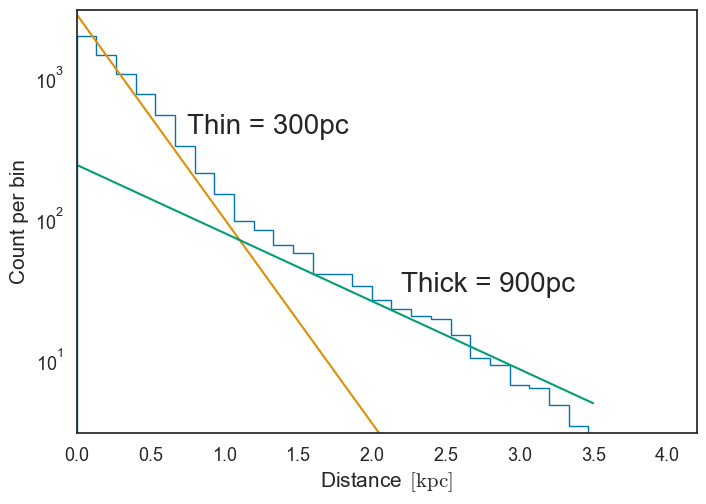

In [ ]:
%matplotlib inline
fig = plt.figure("Vertical disc density profile")
xx = np.linspace(0.,3.5)
nbins=30
plt.hist(1./table2['parallax'],range=[0.,4.],bins=nbins,
         weights=table2['parallax']**2,histtype='step');
plt.ylim(0.001*len(table2),1.*len(table2))
plt.xlim(0.,)
thin_disc_scale_height=0.3 # kpc
thick_disc_scale_height=0.9 # kpc
scaling = len(table2)/(1.*nbins)

plt.plot(xx,28.*scaling*np.exp(-xx/thin_disc_scale_height))
plt.plot(xx,2.4*scaling*np.exp(-xx/thick_disc_scale_height))

plt.semilogy()
plt.xlabel(r'Distance $\,[\mathrm{kpc}]$')
plt.ylabel(r'Count per bin')
plt.annotate('Thick = 900pc', xy=(2.2,.3*scaling),fontsize=20)
plt.annotate('Thin = 300pc', xy=(.75,4.*scaling),fontsize=20)
plt.show()
hide_toggle()

We have overplotted the classical thin/thick disc scaleheight exponentials. Note how beyond $s=3\,\mathrm{kpc}$ incompleteness is an issue.

We can directly compare with the original result from [Gilmore & Reid (1983)](https://ui.adsabs.harvard.edu/abs/1983MNRAS.202.1025G/abstract). They used photometric distances for stars towards the South Galactic Pole.

<img src="gilmore_reid.png" width="600px" align="center">

# *astropy*

```astropy``` is now a very mature package for performing common astronomy calculations. It contains a series of submodules. For example:
- ```constants```
- ```cosmology```
- ```timeseries```
- ...

Here I will look at four submodules: ```constants```, ```table```, ```units``` and ```coordinates```.

### ```astropy.table```

Whenever we have generated data from a TAP query ```astroquery``` has returned an ```astropy``` table.

```astropy``` tables are very useful for manipulating data. Columns can simply be accessed by referring to the column name and you can index the array in the normal ```numpy``` way.

In [ ]:
print(table['parallax'][:2])

     parallax     
       mas        
------------------
 1.089865544532776
0.9052713373183107


Very simple to write to ```csv```, ```fits``` etc. using ```table.write```

### ```astropy.units```

Additionally, all of the columns have come complete with a unit. If we wanted to convert the column to a different unit, we would simply do

In [ ]:
import astropy.units as u
table['parallax'].to(u.rad)

<Quantity [5.28381727e-09, 4.38887929e-09, 1.73561420e-09, ...,
           1.27408333e-08, 6.42067410e-09, 3.08629355e-09] rad>

Note if we try to convert to an incompatible unit, things break.

In [ ]:
try:
    table['parallax'].to(u.m)
except:
    print('UnitConversionError')

UnitConversionError


With units, we can perform calculations and ```astropy``` will keep track of the units for us.

### ```astropy.constants```

```astropy``` contains a bunch of physical constants. For example, let's compute the orbital period of the Earth.

In [ ]:
from astropy.constants import G, M_sun, au
print(G)
print('\n')
print(M_sun)
print('\n')
print(au)
G

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


  Name   = Astronomical Unit
  Value  = 149597870700.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2012 Resolution B2


<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [ ]:
period_orbit = np.sqrt(4.*np.pi**2*au**3/G/M_sun)
period_orbit

<Quantity 31558196.02038122 s>

In [ ]:
period_orbit.to(u.yr)

<Quantity 1.00001889 yr>

In [ ]:
period_orbit = np.sqrt(4.*np.pi**2*(1*u.au)**3/G/(1*u.M_sun))
period_orbit

<Quantity 769089.72019718 AU(3/2) s kg(1/2) / (solMass(1/2) m(3/2))>

In [ ]:
period_orbit.decompose()

<Quantity 31558196.02038122 s>

In [ ]:
u.au.decompose()

Unit("1.49598e+11 m")

In [ ]:
u.Henry.decompose()

Unit("m2 kg / (A2 s2)")

In [ ]:
(u.kg * u.m**2 / u.s**3).compose()

[Unit("W"), Unit("3.31917e-29 Bol"), Unit("2.61233e-27 solLum")]

In [ ]:
M_sun.cgs

<Quantity 1.98840987e+33 g>

### [```astropy.coordinates```](https://docs.astropy.org/en/stable/coordinates/index.html)

```astropy``` is also very useful for performing coordinate transformations.

The fundamental object/class is ```SkyCoord``` which contains an on-sky position and the frame in which the coordinate system is defined.

For example (note we define the units)

In [ ]:
from astropy.coordinates import SkyCoord
coord = SkyCoord(ra = 1.*u.deg, dec = 1.*u.deg, frame='icrs')

We are then able to convert to a different coordinate system using ```transform_to```

In [ ]:
coord.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (98.94104206, -59.64379646)>

Many different frames are defined. We can convert to Heliocentric, Barycentric, Supergalactic, AltAz.

# Application 2: All-sky map of the Galaxy

Let's use this to generate a map of the Galaxy.

Grabbing a random selection of Gaia data (Gaia provides a ```random_index``` to make this simple), we use ```astropy``` to transform to the ```galactic``` frame.

(N.B. Gaia provides Galactic coordinates so we could have used ```l```,```b``` columns instead).

INFO: Query finished. [astroquery.utils.tap.core]


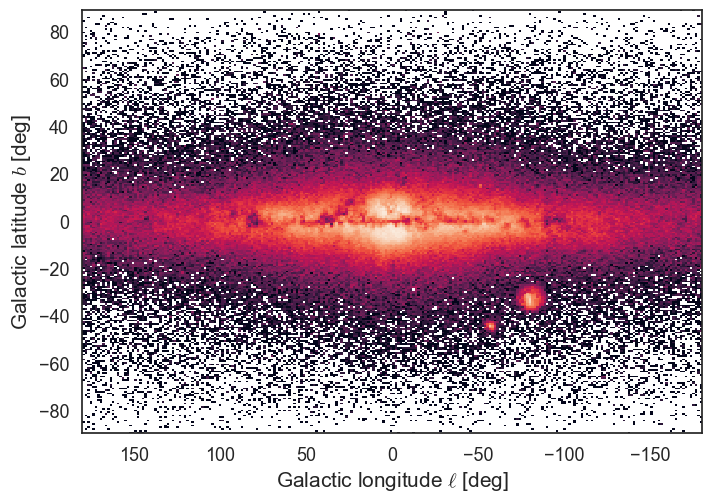

In [ ]:
%matplotlib inline
from matplotlib.colors import LogNorm
on_sky = Gaia.launch_job_async('''
select ra, dec, parallax, parallax_over_error, pmra, pmdec
from gaiadr3.gaia_source where random_index<500000
''').get_results()
sky_coord = SkyCoord(ra = on_sky['ra'], dec = on_sky['dec'], frame='icrs')
galactic = sky_coord.transform_to('galactic')

plt.figure('On-sky map')
plt.hist2d((galactic.l.wrap_at(180.*u.deg)).deg,
           galactic.b.deg,bins=250,
           norm=LogNorm()
           );
plt.gca().invert_xaxis()
plt.xlabel(r'Galactic longitude $\ell$ [deg]')
plt.ylabel(r'Galactic latitude $b$ [deg]');

<img src="plots/coordinate_system.png" width="900px" ></img>

The ```SkyCoord``` object can be supplemented with different properties. For example, the distance can be specified as


In [ ]:
from astropy.coordinates import Galactocentric, Distance

full_3d = SkyCoord(ra = on_sky['ra'], dec = on_sky['dec'],
                   distance = on_sky['parallax'].to(u.kpc, u.parallax()))
gcen=full_3d.transform_to(Galactocentric)

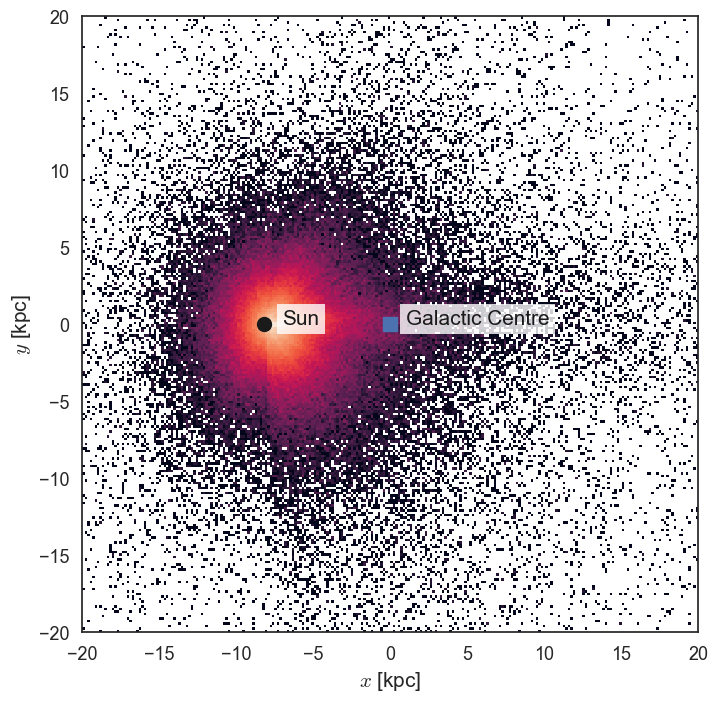

In [ ]:
%matplotlib inline
plt.figure('Top-down Galaxy',figsize=[8,8])
plt.hist2d(gcen.x.data, gcen.y.data, range=[[-20,20],[-20,20]],bins=250,
          norm=LogNorm());
plt.gca().set_aspect('equal')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')
plt.plot([-8.18],[0.],'k.',ms=20)
t=plt.annotate('Sun', xy=(-7,0),color='k')
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.plot([0.],[0.],'bs',ms=10)
t=plt.annotate('Galactic Centre', xy=(1,0),color='k')
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='none'))
hide_toggle()

Or we could look at the proper motions in the Galactic system where the rotation of the Sun around the Galaxy is clear.

In [ ]:
pm_icrs = SkyCoord(ra = on_sky['ra'], dec = on_sky['dec'],
                  pm_ra_cosdec = on_sky['pmra'], pm_dec = on_sky['pmdec'])
pm_gal = pm_icrs.transform_to('galactic')

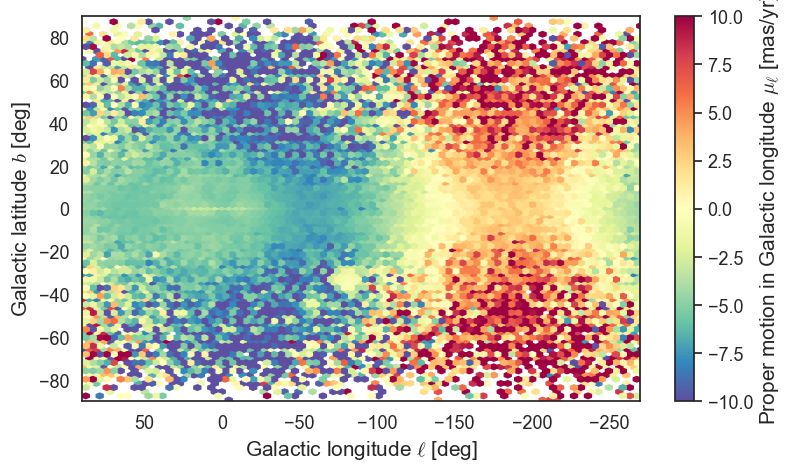

In [ ]:
%matplotlib inline
plt.figure('On-sky map Proper Motion', figsize=[9.,5.])
plt.hexbin((galactic.l.wrap_at(90.*u.deg)).deg,
           galactic.b.deg,
           C=pm_gal.pm_l_cosb,
           vmin=-10,vmax=10,gridsize=80,
           cmap=plt.cm.Spectral_r
           );
plt.gca().invert_xaxis()
plt.xlabel(r'Galactic longitude $\ell$ [deg]')
plt.ylabel(r'Galactic latitude $b$ [deg]')
plt.colorbar(label=r'Proper motion in Galactic longitude $\mu_\ell$ [mas/yr]')
plt.xlim(90,-270)
plt.ylim(-90,90)
hide_toggle()

# Application 3: Local velocity structure

Furthermore, we can use the ```SkyCoord``` to do full 3D transformations.

Let's look at a sample of stars near the Sun with radial velocities measured by Gaia (Gaia RVS -- using DR2 but there are now many more in Gaia DR3).

In [ ]:
rvs_sample = Gaia.launch_job_async('''
select ra, dec, parallax, pmra, pmdec, radial_velocity
from gaiadr3.gaia_source
where random_index<500000000
and radial_velocity is not null
and parallax_over_error>5
and parallax>10
''').get_results()

full_3d_wvel = SkyCoord(ra = rvs_sample['ra'], dec = rvs_sample['dec'],
                        distance = rvs_sample['parallax'].to(u.kpc, u.parallax()),
                        pm_ra_cosdec=rvs_sample['pmra'], pm_dec=rvs_sample['pmdec'],
                        radial_velocity=rvs_sample['radial_velocity'])

gcen_full=full_3d_wvel.transform_to(Galactocentric)

INFO: Query finished. [astroquery.utils.tap.core]


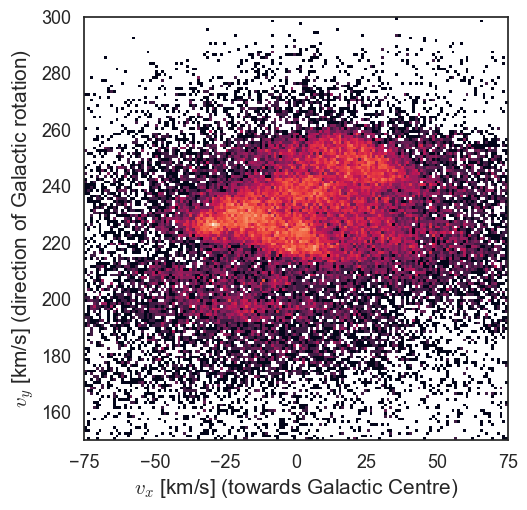

In [ ]:
%matplotlib inline
plt.figure('Local structure in solar neighbourhood')
plt.hist2d(gcen_full.v_x.data, gcen_full.v_y.data, range=[[-75,75],[150,300]],bins=150,
          norm=LogNorm());
plt.gca().set_aspect('equal')
plt.xlabel('$v_x$ [km/s] (towards Galactic Centre)')
plt.ylabel('$v_y$ [km/s] (direction of Galactic rotation)')
hide_toggle()

[Katz+ (2018)](https://ui.adsabs.harvard.edu/abs/2018A%26A...616A..11G/abstract)

<img src="plots/uv_plane_annotate.png">

[Dehnen 1999](https://ui.adsabs.harvard.edu/abs/1999ApJ...524L..35D/abstract)

<img src="plots/dehnen_uv.png" width="600px">

# Application 4: Gaia spiral

We can similarly look at the disc substructure in the vertical direction.

The Gaia phase-space spiral/snail discovered by Teresa Antoja ([Antoja+ 2018](https://ui.adsabs.harvard.edu/abs/2018Natur.561..360A/abstract)) is seen by plotting the vertical velocities against vertical displacements and colouring by the rotational velocity.

In [ ]:
rvs_sample_spiral = Gaia.launch_job_async('''
select ra, dec, parallax, pmra, pmdec, radial_velocity
from gaiadr3.gaia_source
where random_index<100000000
and radial_velocity is not null
and parallax_over_error>5
and parallax>1
''').get_results()
full_3d_wvel_spr = SkyCoord(ra = rvs_sample_spiral['ra'], dec = rvs_sample_spiral['dec'],
                        distance = rvs_sample_spiral['parallax'].to(u.kpc, u.parallax()),
                        pm_ra_cosdec=rvs_sample_spiral['pmra'],
                        pm_dec=rvs_sample_spiral['pmdec'],
                        radial_velocity=rvs_sample_spiral['radial_velocity'])
gcen_full_spr=full_3d_wvel_spr.transform_to(Galactocentric)

INFO: Query finished. [astroquery.utils.tap.core]


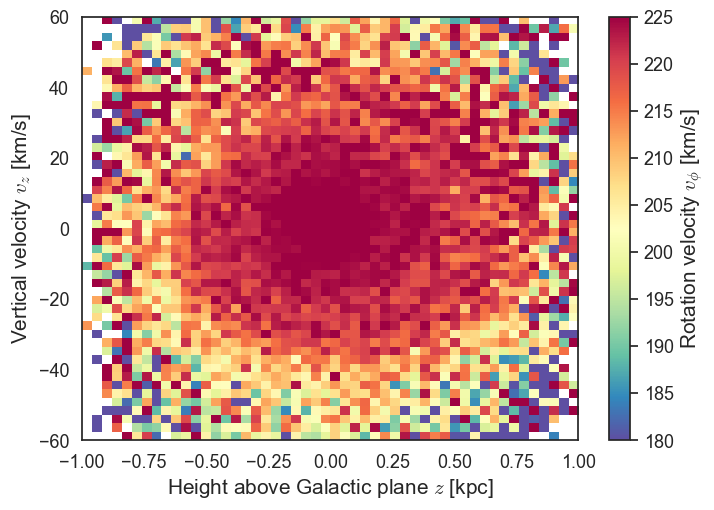

In [ ]:
%matplotlib inline
plt.figure('Gaia spiral')

R = np.sqrt(gcen_full_spr.x.value**2+gcen_full_spr.y.value*2)
v_phi = (-gcen_full_spr.x.value*gcen_full_spr.v_y.value
         +gcen_full_spr.y.value*gcen_full_spr.v_x.value)/R

from scipy.stats import binned_statistic_2d
fltr = (R>8.1)&(R<8.6)
V=binned_statistic_2d(
           gcen_full_spr.z.value[fltr], gcen_full_spr.v_z.value[fltr],
           v_phi[fltr],
           range=[[-1,1],[-60,60]],
           bins=50);
plt.imshow(V.statistic.T,
           extent=[np.min(V.x_edge),np.max(V.x_edge),
                   np.min(V.y_edge),np.max(V.y_edge)],vmin=180,vmax=225,
          cmap=plt.cm.Spectral_r,origin='lower')
plt.gca().set_aspect('auto')
plt.xlabel('Height above Galactic plane $z$ [kpc]')
plt.ylabel(r'Vertical velocity $v_z$ [km/s]')
plt.colorbar(label=r'Rotation velocity $v_\phi$ [km/s]')
plt.show()
hide_toggle()

This spiral is clear evidence that the Milky Way is not in equilibrium but instead in a state of flux.

<img src="plots/antoja.png"></img>

The Galaxy appears to be relaxing back to equilibrium after being perturbed.

One likely explanation is the Sagittarius dwarf galaxy.

# Galactic Dynamics packages

There are three 'standard' galactic dynamics packages:
- [galpy](https://www.galpy.org/) - Gravitational potentials; Orbit integration; AA computation; stream modelling; compatibility with `astropy`
- [gala](https://gala.adrian.pw/) - Gravitational potentials; Orbit integration; stream modelling; compatibility with `astropy`
- [agama](http://agama.software/) - Gravitational potentials; Orbit integration; AA computation; dynamical modelling

Each have their own advantages and functionality. A biased opinion: `galpy`/`gala` are easier to use but `agama` is more computationally powerful.

# Basic use of `galpy`

We will now explore some of the basic functionality of ```galpy```.
1. Gravitational potentials
2. Orbit integration
3. Action-angle computation

## 1. Gravitational potentials

```galpy``` implements a range of gravitational potentials relevant for galactic systems. These form the basis of orbit integration. action-angle computation etc.

In [ ]:
import galpy.potential
print([p for p in dir(galpy.potential) if 'Potential' in p])

['AdiabaticContractionWrapperPotential', 'AnyAxisymmetricRazorThinDiskPotential', 'AnySphericalPotential', 'BurkertPotential', 'CorotatingRotationWrapperPotential', 'CosmphiDiskPotential', 'DehnenBarPotential', 'DehnenCoreSphericalPotential', 'DehnenSmoothWrapperPotential', 'DehnenSphericalPotential', 'DiskSCFPotential', 'DoubleExponentialDiskPotential', 'EllipsoidalPotential', 'EllipticalDiskPotential', 'FerrersPotential', 'FlattenedPowerPotential', 'GaussianAmplitudeWrapperPotential', 'HenonHeilesPotential', 'HernquistPotential', 'HomogeneousSpherePotential', 'InterpSnapshotRZPotential', 'IsochronePotential', 'IsothermalDiskPotential', 'JaffePotential', 'KGPotential', 'KeplerPotential', 'KingPotential', 'KuzminDiskPotential', 'KuzminKutuzovStaeckelPotential', 'KuzminLikeWrapperPotential', 'LogarithmicHaloPotential', 'LopsidedDiskPotential', 'MN3ExponentialDiskPotential', 'MWPotential', 'MWPotential2014', 'MiyamotoNagaiPotential', 'MovingObjectPotential', 'NFWPotential', 'NullPotentia

## MW-like potentials

The 'default' gravitational potential in ```galpy``` is ```MWPotential14``` -- this is an axisymmetric multi-component potential fitted to numerous Milky Way constraints.

In [ ]:
from galpy.potential import MWPotential2014
print(MWPotential2014)

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x14147af60>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x14133c260>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x14133f320>]


We can view the circular velocity curve of ```MWPotential14```.

In [ ]:
%matplotlib inline
from galpy.potential import plotRotcurve
plotRotcurve(MWPotential2014,label=r'$\mathrm{MWPotential2014}$',ro=8.,vo=220.) # need to set ro and vo explicitly, because MWPotential2014 has units turned off

We can also compute the epicyclic frequencies of the potential. Remember that these are solely functions of the potential at some fixed radius.

In [ ]:
from galpy.potential import epifreq, verticalfreq
from galpy.util import conversion
## Epicyclic frequencies in km/s/kpc
epifreq(MWPotential2014, R=8.*u.kpc)*conversion.freq_in_Gyr(ro=8.,vo=220.),\
verticalfreq(MWPotential2014, R=8.*u.kpc)*conversion.freq_in_Gyr(ro=8.,vo=220.)

(np.float64(37.713932955437194), np.float64(76.65469632881388))

## 2. Orbit integration

We can also use ```galpy``` to perform orbit integrations. For instance, we can initialize the orbit of known objects using

In [ ]:
from galpy.orbit import Orbit
orbit = Orbit.from_name('OmegaCen')

We then integrate the orbit for some time period in some potential:

In [ ]:
import numpy as np
orbit.integrate(t=10.*u.Gyr*np.linspace(0.,1.,5000), pot=MWPotential2014)

In [ ]:
orbit.animate3d()

In [ ]:
orbit.animate(d1='R', d2='z')

In [ ]:
orbit.animate(d1=['x','x'], d2=['y','z'],width=800)

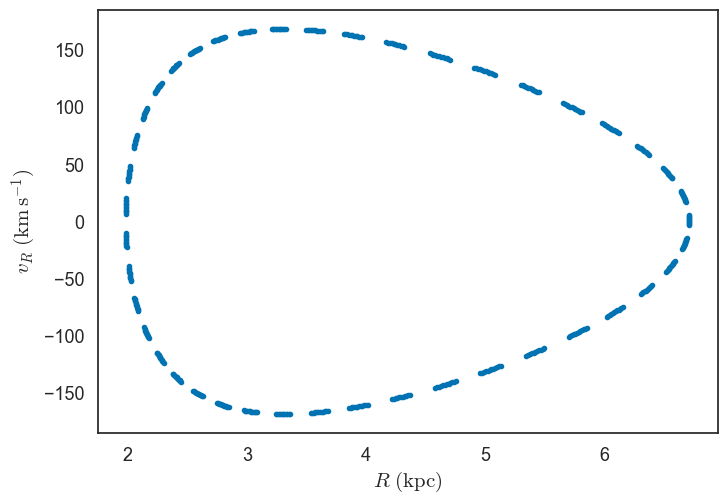

In [ ]:
orbit.plotSOS(MWPotential2014)

We can also more explicitly define the orbit. For instance, using an ```astropy SkyCoord``` or using R, z, ...

In [ ]:
orbit_from_SkyCoord = Orbit(orbit.SkyCoord())

In [ ]:
galcen = orbit.SkyCoord().transform_to(Galactocentric)
R = np.sqrt(galcen.x**2+galcen.y**2)
vR = (galcen.v_x*galcen.x+galcen.v_y*galcen.y)/R
vT = -(-galcen.v_x*galcen.y+galcen.v_y*galcen.x)/R
phi = np.arctan2(galcen.x,galcen.y)+np.pi/2.*u.rad
orbits_gc = Orbit(vxvv=[R,vR,vT,galcen.z,galcen.v_z,phi])

In [ ]:
orbits = Orbit([orbit, orbit_from_SkyCoord, orbits_gc])
orbits.integrate(t=np.linspace(0.,10.,5000)*u.Gyr, pot=MWPotential2014)
orbits.animate()

Or we can work with lists of named orbits

In [ ]:
orbits = Orbit.from_name(['OmegaCen', 'Sgr'])

In [ ]:
orbits.plotSOS(MWPotential2014)

In [ ]:
orbits.rperi(), orbits.rap(), orbits.rguiding(), orbits.E()

(array([ 1.98135748, 15.98698274]),
 array([ 6.71669943, 83.9698609 ]),
 array([2.80628881, 5.78132192]),
 array([-65949.83941341,  22504.61704771]))

There is also functionality to grab a whole range of orbits (e.g. globular clusters or dwarf spheroidals in Milky Way).

In [ ]:
orbits = Orbit.from_name('MW globular clusters')
orbits.integrate(t=np.linspace(0.,4.*u.Gyr,500), pot=MWPotential2014, method='symplec4_c')
plt.hist(orbits.e());
plt.xlabel('Eccentricity')

Text(0.5, 0, 'Eccentricity')

Finally, can look at changing the potential...

Text(0.5, 1.0, 'MWPotential2014')

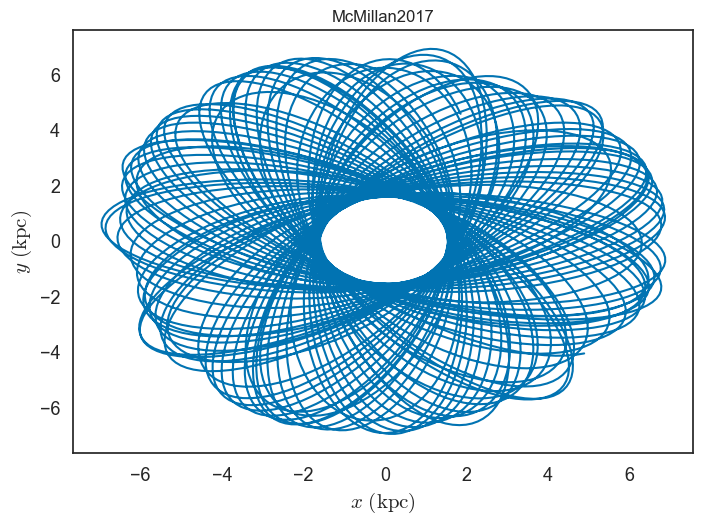

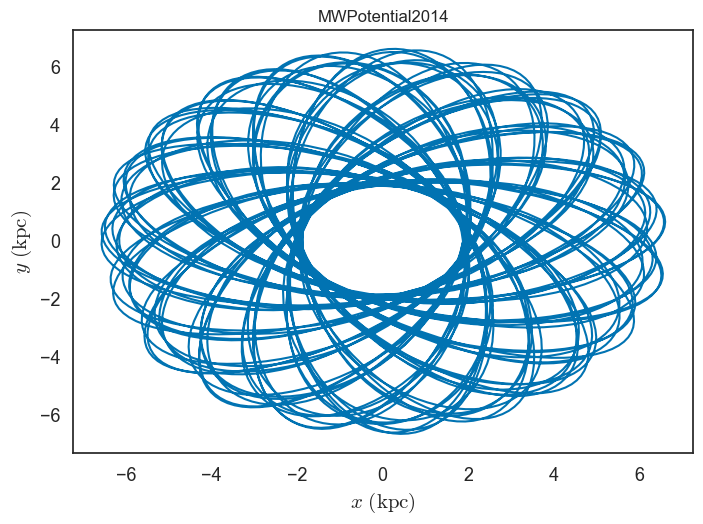

In [ ]:
from galpy.util.conversion import get_physical
from galpy.potential.mwpotentials import McMillan17
oo = Orbit.from_name("OmegaCen", **get_physical(McMillan17))
oo.integrate(t=10.*u.Gyr*np.linspace(0.,1.,5000), pot=McMillan17)
oo.plot(d1='x',d2='y')
plt.title('McMillan2017')
oo = Orbit.from_name("OmegaCen")
oo.integrate(t=10.*u.Gyr*np.linspace(0.,1.,5000), pot=MWPotential2014)
oo.plot(d1='x',d2='y')
plt.title('MWPotential2014')

## 3. Actions and angle

One last powerful functionality of ```galpy``` that we will inspect is the ability to compute action-angle coordinates. By default this is done using the Stäckel fudge approach that we met in the lectures.

(np.float64(13.053318713987982),
 np.float64(1711.3982449622506),
 np.float64(0.3435441551265751))

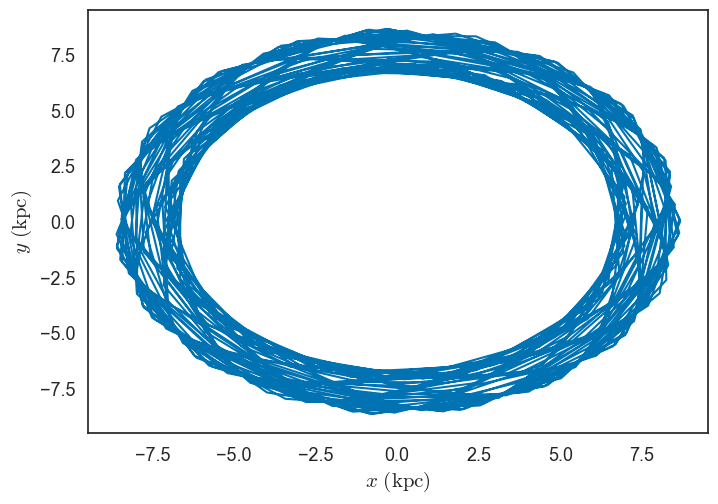

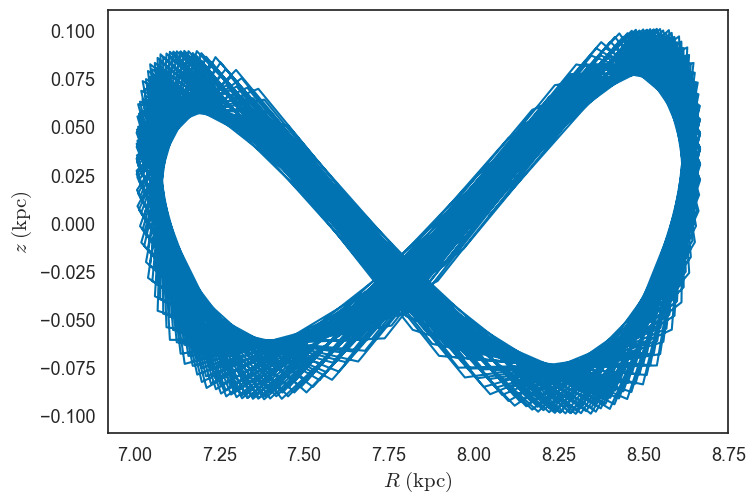

In [ ]:
%matplotlib inline
orbit = Orbit.from_name('Hyades')
orbit.integrate(t=np.linspace(0.,10.*u.Gyr,500), pot=MWPotential2014)
orbit.plot(d1='x',d2='y')
orbit.plot(d1='R',d2='z')
orbit.jr(pot=MWPotential2014), orbit.jp(pot=MWPotential2014), orbit.jz(pot=MWPotential2014)

And the frequencies. We can compare with the epicyclic frequencies evaluated at the guiding centre of the orbit (the circular orbit with the equivalent angular momentum).

In [ ]:
orbit.Or(pot=MWPotential2014), orbit.Op(pot=MWPotential2014), orbit.Oz(pot=MWPotential2014)

(np.float64(38.604488003190085),
 np.float64(28.697295928874993),
 np.float64(77.0690051114529))

In [ ]:
epifreq(MWPotential2014,orbit.rguiding(pot=MWPotential2014)/8.)*conversion.freq_in_Gyr(ro=8.,vo=220.),\
verticalfreq(MWPotential2014,orbit.rguiding(pot=MWPotential2014)/8.)*conversion.freq_in_Gyr(ro=8.,vo=220.)

(np.float64(39.113129028664055), np.float64(79.70156869259029))

We can also be more explicit with the definition of the action-angle finder.

[[ 211.18855485]
 [-585.75603542]
 [ 129.33264924]] km kpc / s


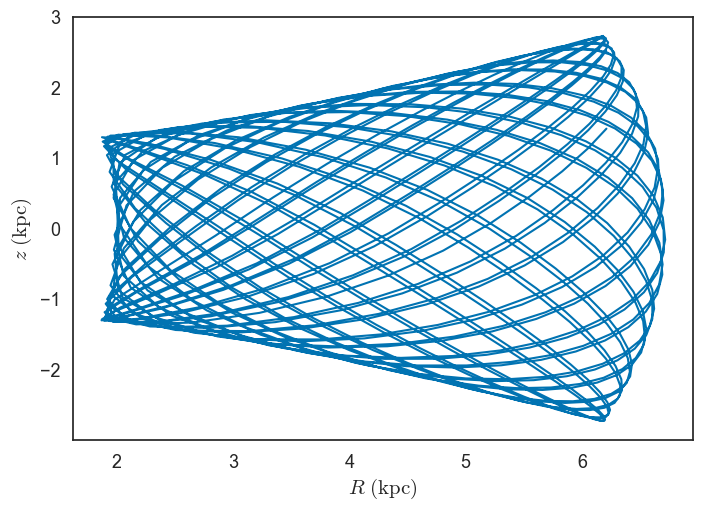

In [ ]:
# Initialize action-finder and compute actions, converting to physical units
from galpy.actionAngle import actionAngleStaeckel
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.6,c=True)
action_unit = 8.*u.kpc * 220.*u.km/u.s
freq_unit = 1./(8.*u.kpc) * 220.*u.km/u.s
o = Orbit.from_name('OmegaCen')
jj = aAS.actionsFreqsAngles(o.R()*u.kpc, o.vR()*u.km/u.s, o.vT()*u.km/u.s,
                            o.z()*u.kpc, o.vz()*u.km/u.s, o.phi()*u.rad)
actions = np.array(jj[:3])*action_unit
frequencies = np.array(jj[3:6])*freq_unit
print(actions)
o.integrate(t=np.linspace(0.,3.*u.Gyr,1000), pot=MWPotential2014)
o.plot(d1='R',d2='z')

[[ 211.18855485  355.90699012]
 [-585.75603542 -585.75603542]
 [ 129.33264924  103.80080169]] km kpc / s


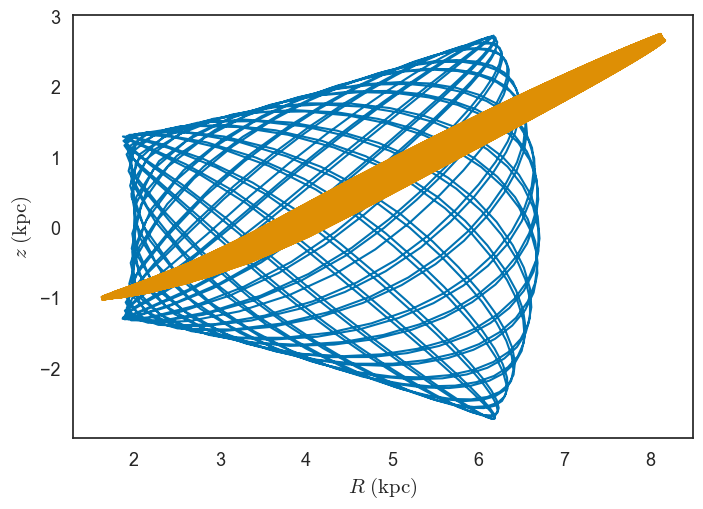

In [ ]:
#Try vR*3, vR*1.5, vz*3
OO = Orbit([o,Orbit(vxvv=[o.R()*u.kpc, o.vR()*u.km/u.s*3, o.vT()*u.km/u.s,
                            o.z()*u.kpc, o.vz()*u.km/u.s, o.phi()*u.rad])])
jj = aAS.actionsFreqsAngles(OO)
actions = np.array(jj[:3])*action_unit
frequencies = np.array(jj[3:6])*freq_unit
print(actions)
OO.integrate(t=np.linspace(0.,3.*u.Gyr,1000), pot=MWPotential2014)
OO.plot(d1='R',d2='z')

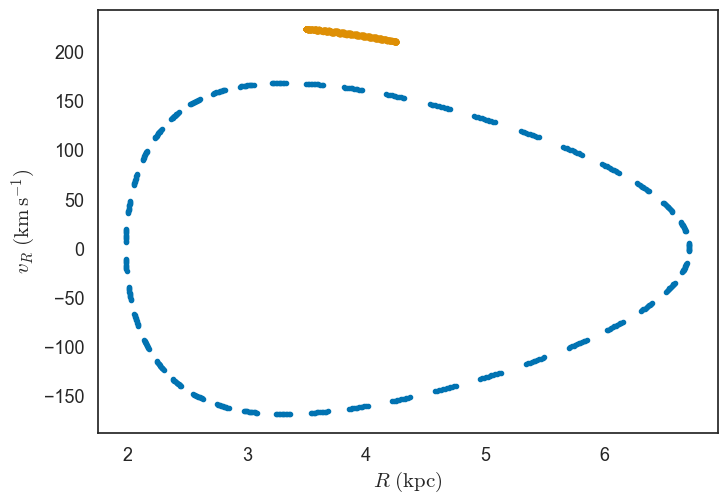

In [ ]:
OO.plotSOS(MWPotential2014)

#### Validity of the Staeckel fudge approximation
We can look at the action variation around an integrated orbit using different choices of the ellipsoidal coordinate system.

<img src="plots/confocal.png" width=500px></img>

(0.0, 300.0)

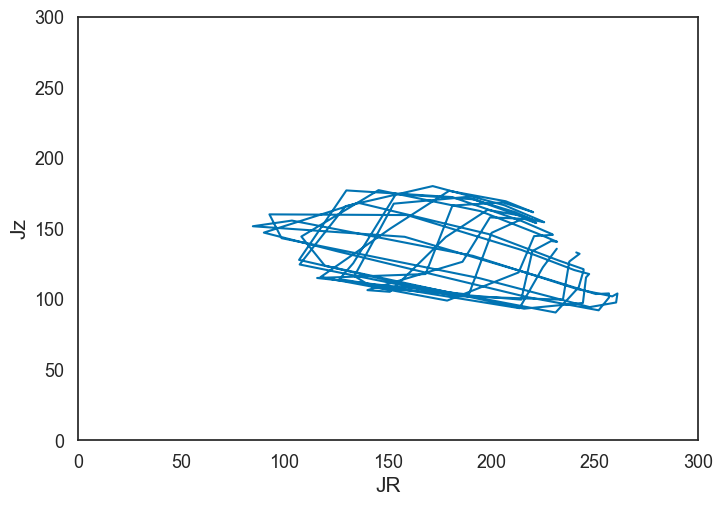

In [ ]:
%matplotlib inline
delta_choice = 2.
o.integrate(t=np.linspace(0.,1.*u.Gyr, 100), pot=MWPotential2014)
plt.figure()
plt.plot(np.array([aAS.actionsFreqsAngles(Orbit(o.getOrbit()[ii]),delta=delta_choice)[0]*action_unit for ii in range(100)]),
        np.array([aAS.actionsFreqsAngles(Orbit(o.getOrbit()[ii]),delta=delta_choice)[2]*action_unit for ii in range(100)]));
plt.xlabel('JR')
plt.ylabel('Jz')
plt.xlim(0.,300.)
plt.ylim(0.,300.)

A good test of the approximation is how straight the angle-angle lines are -- not bad considering it is a halo-ish orbit.

Text(0, 0.5, '$\\theta_\\phi$')

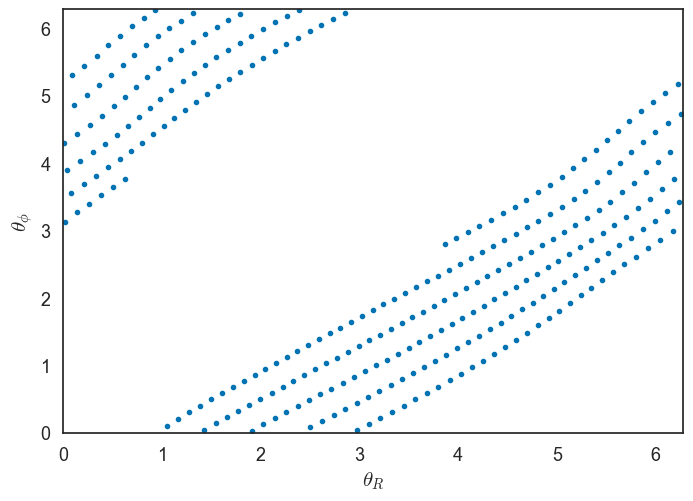

In [ ]:
%matplotlib inline
o.integrate(t=np.linspace(0.,0.5*u.Gyr, 300), pot=MWPotential2014)
plt.figure()
plt.plot(np.array([aAS.actionsFreqsAngles(Orbit(o.getOrbit()[ii]))[6] for ii in range(300)]),
        np.array([aAS.actionsFreqsAngles(Orbit(o.getOrbit()[ii]))[8] for ii in range(300)]),'.');
# plt.xlabel('JR')
# plt.ylabel('Jz')
plt.xlim(0.,2*np.pi)
plt.ylim(0.,2*np.pi)
plt.xlabel(r'$\theta_R$')
plt.ylabel(r'$\theta_\phi$')

# Activity 1: Pick a star, any star

1. Pick one star with `random_index/1811709771*365` near the day of the year you were born — e.g. `datetime(year, month, day).timetuple().tm_yday`
2. To make it interesting, restrict to 'good quality' parallaxes (`parallax_over_error>5`), ~distant stars (`parallax<0.3`) and metal-poor (```mh_gspphot<-1.0```).
3. Visualize its orbit and surface of section -- remember the steps are create a SkyCoord using ```astropy``` and pass to ```galpy```.
4. Find the actions and energy
5. Take a post-it/sticky note, write your name on it and put in the ‘action diamond’ plot on board (low energy $<-85000 (km/s)^2$; high energy $>-50000 (km/s)^2$)
6. Add an associated plot labelled by your name on the [Google Drive](https://drive.google.com/drive/folders/18-JlfwJHBvRVz_k3P_mK0ks-xivoCEr2?usp=sharing)

If you are done quickly, look at different potentials (```McMillan17```, ```Irrgang13I```), propagate uncertainties through calculation

# Activity 2: Group tasks

1. Visualize the ($v_R$, $v_\phi$) plane for stars near the Sun (try splitting by the metallicity provided by Gaia -- ```mh_gspphot```
2. Visualize the ($z$, $v_z$) plane (coloured by $v_\phi$) — identify the Gaia spiral/snail
3. Make a model of the Gaia snail -- launch a series of stars with z=0 at different vz and a range of v_phi
3. Plot the action-angle distributions for stars near the Sun
4. Test the validity of the epicyclic approximation (https://galaxiesbook.org/chapters/II-03.-Orbits-in-Disks.html#The-separability-of-disk-orbits)
5. Validate that orbits are approximately bounded by confocal ellipsoidal coordinate surfaces (https://mathworld.wolfram.com/ConfocalEllipsoidalCoordinates.html). Inspect the action variation as you change $\Delta$.
6. Visualize surfaces of section. Attempt to find different resonances (1:1 etc.).
7. Check the validity of the Staeckel fudge approximation around resonances
8. Try taking all MW satellites using ```Orbit.from_name('MW satellite galaxies')``` and finding their actions

Remember use `random_index` if queries are slow

# Summary

- We have seen how to use TAP/ADQL to query large databases.
- We have used ```astropy``` to handle constants, units, tables and coordinate systems.
- We have seen some of the rich structure of stellar distributions within the Milky Way.
- We have looked at the basic functionality of ```galpy```. In particular, looking at potentials, orbit integrations and angle-action computation.